# 1. Data API
This is the first method by which we can read huge amount of data and preprocess them.

In [6]:
import tensorflow as tf
def cls():
    tf.keras.backend.clear_session()
    tf.random.set_seed(42)

In [9]:
#########################################
# Dataset API always return new dataset #
#########################################
x = tf.range(10)
dataset = tf.data.Dataset.from_tensor_slices(x)
dataset

<TensorSliceDataset shapes: (), types: tf.int32>

In [10]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [16]:
X_nested = {"a": ([1, 2, 3], [4, 5, 6]), "b": [7, 8, 9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for idx, item in enumerate(dataset):
    print(idx+1,'\n\t', item)

1 
	 {'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
2 
	 {'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
3 
	 {'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


### 1.1. Chaining Tranformations

In [25]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7) # repeat each value 3 times and sort randomly then create batch
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
2 	 tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
3 	 tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
4 	 tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
5 	 tf.Tensor([8 9], shape=(2,), dtype=int32)


In [26]:
dataset = dataset.map(lambda x: x*2) # x is a single batch
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
2 	 tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
3 	 tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
4 	 tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
5 	 tf.Tensor([16 18], shape=(2,), dtype=int32)


In [28]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
2 	 tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
3 	 tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


In [33]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3).batch(7)
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
2 	 tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
3 	 tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
4 	 tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
5 	 tf.Tensor([8 9], shape=(2,), dtype=int32)


In [34]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3).batch(7,drop_remainder=True)
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
2 	 tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
3 	 tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
4 	 tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)


### 1.2. Shuffling the Data

In [105]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3)
# Shuffling the data
dataset = dataset.shuffle(buffer_size=7,seed=42).batch(7)
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([3 1 7 0 5 0 2], shape=(7,), dtype=int32)
2 	 tf.Tensor([4 1 2 6 6 3 5], shape=(7,), dtype=int32)
3 	 tf.Tensor([9 7 8 4 3 4 5], shape=(7,), dtype=int32)
4 	 tf.Tensor([0 8 1 2 9 8 7], shape=(7,), dtype=int32)
5 	 tf.Tensor([9 6], shape=(2,), dtype=int32)


In [106]:
# If we call repeat() on shuffled data by default it will generate new order at every iteration. This is generally
# a good idea. to reuse the same order we can set reshuffle_each_iteration=False

dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(3)
dataset = dataset.shuffle(buffer_size=7, seed=42,reshuffle_each_iteration=False).batch(7)
for idx, item in enumerate(dataset):
    print(idx+1,'\t', item)

1 	 tf.Tensor([6 2 0 9 5 4 1], shape=(7,), dtype=int32)
2 	 tf.Tensor([2 8 3 4 5 1 7], shape=(7,), dtype=int32)
3 	 tf.Tensor([8 3 6 1 3 0 6], shape=(7,), dtype=int32)
4 	 tf.Tensor([7 8 7 9 9 2 4], shape=(7,), dtype=int32)
5 	 tf.Tensor([5 0], shape=(2,), dtype=int32)


### 1.3. Interleaving lines from multiple files

In [107]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [108]:
# Lets split data into 30 csvs files.

import numpy as np
from pathlib import Path

def save_to_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = Path() / "datasets" / "housing"
    housing_dir.mkdir(parents=True, exist_ok=True)
    filename_format = "my_{}_{:02d}.csv"

    filepaths = []
    m = len(data)
    chunks = np.array_split(np.arange(m), n_parts)
    for file_idx, row_indices in enumerate(chunks):
        part_csv = housing_dir / filename_format.format(name_prefix, file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv, "w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_csv_files(test_data, "test", header, n_parts=10)


In [110]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



In [112]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [118]:
# Let build the input pipeline
# list_files return the dataset of shuffled filepath
# If we dont want to shuffle then pass shuffle=False
filepath_dataset = tf.data.Dataset.list_files(train_filepaths,seed=42)
for i in filepath_dataset:
    print(i)

tf.Tensor(b'datasets\\housing\\my_train_15.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_08.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_03.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_01.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_10.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_05.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_19.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_16.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_02.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_09.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_00.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_07.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_12.csv', shape=(), dtype=string)
tf.Tensor(b'datasets\\housing\\my_train_04.csv', sh

In [119]:
# interleave() will read from X files at a time and interleave their lines
# skipping the first line of each file. which is the geader row using the skip method
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

# interleave() call lambda function for each path that we gave
# In this case we pass TextLineDataset
    

In [133]:
# We can see each tensor written data in string format
for idx, line in enumerate(dataset.take(4)):
    print(idx,"\t",line)

0 	 tf.Tensor(b'4.7361,7.0,7.464968152866242,1.1178343949044587,846.0,2.694267515923567,34.49,-117.27,1.745', shape=(), dtype=string)
1 	 tf.Tensor(b'3.8456,35.0,5.461346633416459,0.9576059850374065,1154.0,2.8778054862842892,37.96,-122.05,1.598', shape=(), dtype=string)
2 	 tf.Tensor(b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625', shape=(), dtype=string)
3 	 tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)


In [134]:
# Let create the function that will convert string into numerical with normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_mean, X_std = scaler.mean_, scaler.scale_
n_inputs = 8

def parse_csv_line(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    return tf.stack(fields[:-1]), tf.stack(fields[-1:])

def preprocess(line):
    x, y = parse_csv_line(line)
    return (x - X_mean) / X_std, y

In [135]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [138]:
###############################
# Putting Everything together #
###############################
def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    # prefetch() is used to fetch one batch in advance while model busy in training
    return dataset.batch(batch_size).prefetch(1)

In [139]:
example_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in example_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[-1.2345318   0.1879177  -0.18384208  0.19340092 -0.4273575   0.49201018
   1.0838584  -1.3871703 ]
 [-1.3836461  -0.7613805  -0.3076956  -0.07978077 -0.05045014  0.32237166
   0.50294524 -0.1027696 ]
 [-0.41767654 -0.91959685 -0.5876468  -0.01253252  2.441884   -0.30059808
  -0.68699217  0.521939  ]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[0.804]
 [0.53 ]
 [1.745]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[-0.58831733  0.02970133 -0.70486885  0.16348003  0.8174406  -0.29916376
  -0.70573175  0.6568782 ]
 [-1.3526396  -1.868895   -0.84703934 -0.0277291   0.58563805 -0.10333684
  -1.3756571   1.2116159 ]
 [-0.16590534  1.8491895  -0.24013318 -0.0694841  -0.141711   -0.41202638
   0.994848   -1.4321475 ]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[2.045  ]
 [3.25   ]
 [5.00001]], shape=(3, 1), dtype=float32)



In [140]:
# List of all methods of the tf.data.Dataset class
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● flat_map()           Maps `map_func` across this dataset and flattens the result.
● from_generator()     Creates a `Dataset` whose elements are generated by `generator`. (deprecated arguments)
● from_tensor_sli

In [141]:
#------------------------------------------------------------------------------------------------------------
# list_files() ----> repeat() ----> interleave() ----> shuffle() ----> map() ----> batch() ----> prefetch() |
#------------------------------------------------------------------------------------------------------------


In [142]:
# Reading dataset with keras 
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [143]:
cls()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu",input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
his = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
363/363 [==============================] - 2s 3ms/step - loss: 0.6767 - val_loss: 18.1770
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4770 - val_loss: 8.2161
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4608 - val_loss: 14.5541
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4817 - val_loss: 1.5206
Epoch 5/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4077 - val_loss: 0.4114


In [147]:
print(model.evaluate(test_set))
# test_set.take(1) will return 1 batch of 32 instance
y_pred = model.predict(test_set.take(1))  # or you could just pass a NumPy array
y_pred


162/162 [==============================] - 0s 723us/step - loss: 0.3981
0.39810454845428467


array([[1.9874864],
       [2.4812346],
       [1.5527377],
       [1.1240149],
       [1.4292467],
       [1.508944 ],
       [0.6371482],
       [1.7069902],
       [1.3616544],
       [1.2186487],
       [1.1212282],
       [2.955546 ],
       [2.4550068],
       [2.7727196],
       [2.6564398],
       [1.3931558],
       [0.9303869],
       [2.3084965],
       [1.1619788],
       [2.496304 ],
       [2.4537048],
       [1.016889 ],
       [2.0262537],
       [2.1262503],
       [1.7731403],
       [1.5601666],
       [1.4715728],
       [1.679666 ],
       [2.7601225],
       [2.4638104],
       [1.8324133],
       [2.2466574]], dtype=float32)

In [155]:
# defines the optimizer and loss function for training
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error

n_epochs = 5
for epoch in range(n_epochs):
    for X_batch, y_batch in train_set:
        print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 5/5

In [156]:
# Custom function

@tf.function
def train_one_epoch(model, optimizer, loss_fn, train_set):
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
for epoch in range(n_epochs):
    print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
    train_one_epoch(model, optimizer, loss_fn, train_set)

Epoch 5/5

# 2. The TFRecord Format
A TFRecord file is just a list of binary records. You can create one using a `tf.io.TFRecordWriter:`

In [168]:
filepaths = "datasets/my_data.tfrecord"
with tf.io.TFRecordWriter(filepaths) as f:
    f.write(b"First line")
    f.write(b"Second line")

In [169]:
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'First line', shape=(), dtype=string)
tf.Tensor(b'Second line', shape=(), dtype=string)


You can read multiple TFRecord files with just one TFRecordDataset. By default it will read them one at a time, but if you set `num_parallel_reads=3,` it will read 3 at a time in parallel and interleave their records:

In [172]:
# How to read multiple files in paralle and interleave them 
filepaths = ["datasets/my_test_{}.tfrecord".format(i) for i in range(5)]
for i, filepath in enumerate(filepaths):
    with tf.io.TFRecordWriter(filepath) as f:
        for j in range(3):
            s = "File {} record {}".format(i, j).encode("utf-8")
            print(s)
            f.write(s)

b'File 0 record 0'
b'File 0 record 1'
b'File 0 record 2'
b'File 1 record 0'
b'File 1 record 1'
b'File 1 record 2'
b'File 2 record 0'
b'File 2 record 1'
b'File 2 record 2'
b'File 3 record 0'
b'File 3 record 1'
b'File 3 record 2'
b'File 4 record 0'
b'File 4 record 1'
b'File 4 record 2'


In [175]:
# Reading sequentially
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


In [178]:
# Reading in parallel
dataset = tf.data.TFRecordDataset(filepaths, num_parallel_reads=5)
for item in dataset:
    print(item)

tf.Tensor(b'File 0 record 0', shape=(), dtype=string)
tf.Tensor(b'File 1 record 0', shape=(), dtype=string)
tf.Tensor(b'File 2 record 0', shape=(), dtype=string)
tf.Tensor(b'File 3 record 0', shape=(), dtype=string)
tf.Tensor(b'File 4 record 0', shape=(), dtype=string)
tf.Tensor(b'File 0 record 1', shape=(), dtype=string)
tf.Tensor(b'File 1 record 1', shape=(), dtype=string)
tf.Tensor(b'File 2 record 1', shape=(), dtype=string)
tf.Tensor(b'File 3 record 1', shape=(), dtype=string)
tf.Tensor(b'File 4 record 1', shape=(), dtype=string)
tf.Tensor(b'File 0 record 2', shape=(), dtype=string)
tf.Tensor(b'File 1 record 2', shape=(), dtype=string)
tf.Tensor(b'File 2 record 2', shape=(), dtype=string)
tf.Tensor(b'File 3 record 2', shape=(), dtype=string)
tf.Tensor(b'File 4 record 2', shape=(), dtype=string)


In [179]:
########################################################################
# IF we want to share data through network it helpful to compress them #
########################################################################
options = tf.io.TFRecordOptions(compression_type="GZIP")
with tf.io.TFRecordWriter("datasets/my_compressed.tfrecord", options) as f:
    f.write(b"Compress, compress, compress!")


In [182]:
# While reading the compressed file we have to pass the compression type as well
dataset = tf.data.TFRecordDataset(["datasets/my_compressed.tfrecord"],
                                  compression_type="GZIP")
for item in dataset:
    print(item)                                  

tf.Tensor(b'Compress, compress, compress!', shape=(), dtype=string)


### 2.1. A Brief Introduction to Protocol Buffers
Even though each record can use any binary format we want. TFRecord files usually contain serialized protocol buffers (also called protobufs) this is portable, extensible, and efficient binary format developed by Google back in 2001 and made open source 2008.
protobufs are now widely used, in particular in gRPC gooogle's remote procedure call system. they are defined using a simple language that writen below.

For this section we need to install protobuf. In general we will not have to do so when using TensorFlow, as it comes with functions to create and parse protocol buffers of type tf.train.Example, which are generally sufficient. However, in this section we will learn about protocol buffers by creating our own simple protobuf definition, so we need the protobuf compiler (protoc): we will use it to compile the protobuf definition to a Python module that we can then use in our code.

First let's write a simple protobuf definition:

In [212]:
%%writefile datasets/person.proto
syntax = "proto3";
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Overwriting datasets/person.proto


And let's compile it (the `--descriptor_set_out` and `--include_imports` options are only required for the `tf.io.decode_proto()` example below):

In [213]:
!protoc datasets/person.proto --python_out=. --descriptor_set_out=datasets/person.desc --include_imports

In [219]:
%ls "datasets/"

 Volume in drive C is OS
 Volume Serial Number is A493-DFE6

 Directory of c:\Users\girraj.jangid\jupyter notebook\Machine Learning\Deep Learning\datasets

15-06-2022  10.44 AM    <DIR>          .
15-06-2022  10.44 AM    <DIR>          ..
15-06-2022  09.04 AM    <DIR>          housing
15-06-2022  10.18 AM                45 my_compressed.tfrecord
15-06-2022  10.18 AM                45 my_compressed_1.tfrecord
15-06-2022  10.11 AM                53 my_data.tfrecord
15-06-2022  10.14 AM                93 my_test_0.tfrecord
15-06-2022  10.14 AM                93 my_test_1.tfrecord
15-06-2022  10.14 AM                93 my_test_2.tfrecord
15-06-2022  10.14 AM                93 my_test_3.tfrecord
15-06-2022  10.14 AM                93 my_test_4.tfrecord
15-06-2022  10.44 AM               101 person.desc
15-06-2022  10.44 AM               114 person.proto
15-06-2022  10.44 AM             1,205 person_pb2.py
              11 File(s)          2,028 bytes
               3 Dir(s)  28,921,032,704 

In [221]:
from datasets.person_pb2 import Person  # import the generated access class

person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person)  # display the Person

name: "Al"
id: 123
email: "a@b.com"



In [224]:
person.name

'Al'

In [225]:
person.name = 'alice'

In [227]:
person.email[0]

'a@b.com'

In [228]:
person.email.append("asdf@.com")

In [229]:
person

name: "alice"
id: 123
email: "a@b.com"
email: "asdf@.com"

In [230]:
s = person.SerializePartialToString() # serialize object into byte string
s

b'\n\x05alice\x10{\x1a\x07a@b.com\x1a\tasdf@.com'

In [234]:
p2 = Person()
p2.ParseFromString(s) # Parse s into p2 29 long byte string

29

In [235]:
person == p2

True

In [239]:
print(person)
print()
print(p2)

name: "alice"
id: 123
email: "a@b.com"
email: "asdf@.com"


name: "alice"
id: 123
email: "a@b.com"
email: "asdf@.com"



In [240]:
#------------------------------------------------------------------------
# CUSTOM PROTOBUF |
#------------------------------------------------------------------------
# In rare cases, you may want to parse a custom protobuf (like the one 
# we just created) in TensorFlow. For this you can use the tf.io.
# decode_proto() function:
#------------------------------------------------------------------------

# how to use the tf.io.decode_proto() function

person_tf = tf.io.decode_proto(
    bytes=s,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="datasets/person.desc")

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'alice'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123])>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'asdf@.com'], dtype=object)>]

### 2.2. Tensorflow Protobufs
Tha main protobuf typically used in a tfrecord file is the `Example` protobuf, which represents one instance in a dataset. it contains a list of named features, where each feature can either be a list of byte strings, a list of floats, or a list of integers. Below is the protobuf definition:

Here is the definition of the tf.train.Example protobuf:

```python
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };```

In [241]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            "name": Feature(bytes_list=BytesList(value=[b"Alice"])),
            "id": Feature(int64_list=Int64List(value=[123])),
            "emails": Feature(bytes_list=BytesList(value=[b"a@b.com",
                                                          b"c@d.com"]))
        }))

In [242]:
with tf.io.TFRecordWriter("datasets/my_contacts.tfrecord") as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

In [243]:
dataset = tf.data.TFRecordDataset(["datasets/my_contacts.tfrecord"])
for item in dataset:
    print(item)  

tf.Tensor(b'\n@\n\x11\n\x04name\x12\t\n\x07\n\x05Alice\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com', shape=(), dtype=string)
tf.Tensor(b'\n@\n\x11\n\x04name\x12\t\n\x07\n\x05Alice\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com', shape=(), dtype=string)
tf.Tensor(b'\n@\n\x11\n\x04name\x12\t\n\x07\n\x05Alice\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com', shape=(), dtype=string)
tf.Tensor(b'\n@\n\x11\n\x04name\x12\t\n\x07\n\x05Alice\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com', shape=(), dtype=string)
tf.Tensor(b'\n@\n\x11\n\x04name\x12\t\n\x07\n\x05Alice\n\x0b\n\x02id\x12\x05\x1a\x03\n\x01{\n\x1e\n\x06emails\x12\x14\n\x12\n\x07a@b.com\n\x07c@d.com', shape=(), dtype=string)


In [244]:
#############################
# Loading & Parsing Example #
#############################

feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

dataset = tf.data.TFRecordDataset(["datasets/my_contacts.tfrecord"]).map(parse)
for parsed_example in dataset:
    print(parsed_example)

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018250799490>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018250799B50>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018251A813A0>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018250799970>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018250799880>, 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, '

In [245]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [249]:
parsed_example['emails'].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [250]:
def parse(serialized_examples):
    return tf.io.parse_example(serialized_examples, feature_description)

dataset = tf.data.TFRecordDataset(["datasets/my_contacts.tfrecord"]).batch(2).map(parse)
for parsed_examples in dataset:
    print(parsed_examples)  # two examples at a time

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x000001825065ED90>, 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123], dtype=int64)>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x00000182459A4A90>, 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123], dtype=int64)>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor object at 0x0000018251A77E20>, 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123], dtype=int64)>, 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>}


In [252]:
parsed_examples

{'emails': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x18251a77e20>,
 'id': <tf.Tensor: shape=(1,), dtype=int64, numpy=array([123], dtype=int64)>,
 'name': <tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>}

In [254]:
# Till now we have seen how to store dictionary, list, string
# using protobuf.
# Now we will see how to store images, tensor in tfrecords.

### 2.3. Storing Images and Tensors in TFRecords

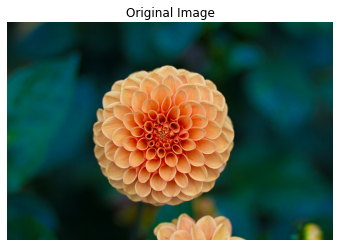

In [263]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][1]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [264]:
# Create an Example protobuf containing the image ecoded as JPEG:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()
with tf.io.TFRecordWriter("datasets/my_image.tfrecord") as f:
    f.write(serialized_example)

Finally, let's create a tf.data pipeline that will read this `TFRecord` file, parse each Example protobuf (in this case just one), and parse and display the image that the example contains:

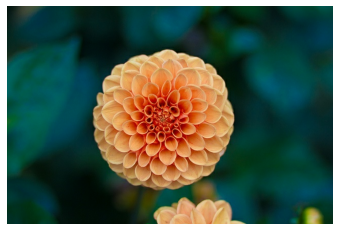

In [271]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }

def parse(serialized_example):
    example_with_image = tf.io.parse_single_example(serialized_example,
                                                    feature_description)
    return tf.io.decode_jpeg(example_with_image["image"].values[0])
    # or you can use tf.io.decode_image() instead

dataset = tf.data.TFRecordDataset("datasets/my_image.tfrecord").map(parse)
for image in dataset:
    plt.imshow(image)
    plt.axis("off")
    plt.show()

Or use `decode_image()` which supports **BMP, GIF, JPEG and PNG formats:**

Tensors can be serialized and parsed easily using `tf.io.serialize_tensor()` and `tf.io.parse_tensor():`

In [273]:
tensor = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
serialized = tf.io.serialize_tensor(tensor)
serialized

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [277]:
tf.io.parse_tensor(serialized, out_type=tf.float32)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

In [278]:
sparse_tensor = parsed_example["emails"]
serialized_sparse = tf.io.serialize_sparse(sparse_tensor)
serialized_sparse

<tf.Tensor: shape=(3,), dtype=string, numpy=
array([b'\x08\t\x12\x08\x12\x02\x08\x02\x12\x02\x08\x01"\x10\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00',
       b'\x08\x07\x12\x04\x12\x02\x08\x02"\x10\x07\x07a@b.comc@d.com',
       b'\x08\t\x12\x04\x12\x02\x08\x01"\x08\x02\x00\x00\x00\x00\x00\x00\x00'],
      dtype=object)>

In [279]:
BytesList(value=serialized_sparse.numpy())

value: "\010\t\022\010\022\002\010\002\022\002\010\001\"\020\000\000\000\000\000\000\000\000\001\000\000\000\000\000\000\000"
value: "\010\007\022\004\022\002\010\002\"\020\007\007a@b.comc@d.com"
value: "\010\t\022\004\022\002\010\001\"\010\002\000\000\000\000\000\000\000"

### 2.4. Handling Lists of Lists Using the SequenceExample Protobuf

```python
syntax = "proto3";

message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
};```

In [286]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]
            
sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

In [287]:
sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [288]:
serialized_sequence_example = sequence_example.SerializeToString()

In [292]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

In [293]:
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["content"])
parsed_context

{'title': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x18253766640>,
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25], dtype=int64)>}

In [294]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [295]:
parsed_feature_lists

{'comments': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x182538cb070>,
 'content': <tensorflow.python.framework.sparse_tensor.SparseTensor at 0x182538cbe20>}

In [296]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'], [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


# 3. Keras API
### 3.1. `Normalization` Layer
This is the 3rd method by which we can process large amount of data

In [305]:
# We don't need to pass scaled data. adapt() will take care of that
cls()
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
norm_layer.adapt(X_train)  # computes the mean and variance of every feature
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=2)
y_pred = model(X_test[:3])  # preprocesses the data and makes predictions
y_pred

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.6287 - val_loss: 1.2771
Epoch 2/2
363/363 [==============================] - 0s 810us/step - loss: 0.8460 - val_loss: 1.3751


<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.075543 ],
       [1.4001741],
       [2.1071248]], dtype=float32)>

In [306]:
# Here we scaled the input data before feeding
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)
cls()
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 1ms/step - loss: 2.6287 - val_loss: 1.2771
Epoch 2/2
363/363 [==============================] - 0s 1ms/step - loss: 0.8460 - val_loss: 1.3751


In [307]:
# since: model do not know about scaled features
y_pred = model(X_test[:3])
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[-87.323265],
       [-95.06128 ],
       [-77.17059 ]], dtype=float32)>

In [308]:
final_model = tf.keras.Sequential([norm_layer, model])
y_pred = final_model(X_test[:3])  # preprocesses the data and makes predictions
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[1.075543 ],
       [1.4001741],
       [2.1071248]], dtype=float32)>

In [312]:
# Creates a dataset to demo applying the norm_layer using map()
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(5)
dataset = dataset.map(lambda X, y: (norm_layer(X), y))
list(dataset.take(1))  # extra code – shows the first batch

[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.1939791 , -1.0778134 , -0.9433871 ,  0.0148516 ,  0.02073434,
          -0.572917  ,  0.92925584, -1.4221287 ],
         [ 0.7519827 , -1.8688954 ,  0.40547717, -0.23327832,  1.8614666 ,
           0.20516507, -0.9165531 ,  1.0966995 ],
         [-0.41469136,  0.02970134,  0.8180875 ,  1.0567819 , -0.08786613,
          -0.29983336,  1.3087229 , -1.6970023 ],
         [ 1.7188951 , -1.315138  ,  0.32664284, -0.21955258, -0.337921  ,
          -0.11146677, -0.9821399 ,  0.9417729 ],
         [-0.96207225, -1.2360299 , -0.05625898, -0.03124549,  1.709061  ,
          -0.30257043, -0.8041173 ,  1.3265921 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

In [313]:
class MyNormalization(tf.keras.layers.Layer):
    def adapt(self, X):
        self.mean_ = np.mean(X, axis=0, keepdims=True)
        self.std_ = np.std(X, axis=0, keepdims=True)

    def call(self, inputs):
        eps = tf.keras.backend.epsilon()  # a small smoothing term
        return (inputs - self.mean_) / (self.std_ + eps)

In [314]:
my_norm_layer = MyNormalization()
my_norm_layer.adapt(X_train)
X_train_scaled = my_norm_layer(X_train)

### 3.2. The Discretization layer

In [318]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
# Split the range into bins
# either we can pass scaler value or numbers.
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]], dtype=int64)>

In [319]:
# Split the data range into num of bins
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]], dtype=int64)>

### 3.3. The CategoryEncoding Layer

In [327]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [336]:
# Encoding the possiblity of row
two_age_categories = tf.constant([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 2.],
       [1., 0., 1.]], dtype=float32)>

In [337]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="count")
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 2.],
       [1., 0., 1.]], dtype=float32)>

In [339]:
two_age_categories + [0, 3]

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 3],
       [2, 5],
       [2, 3]])>

In [338]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3 + 3)
onehot_layer(two_age_categories + [0, 3])  # adds 3 to the second feature


<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [340]:
# shows another way to one-hot encode each feature separately
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3,
                                                output_mode="one_hot")
tf.keras.layers.concatenate([onehot_layer(cat)
                             for cat in tf.transpose(two_age_categories)])


<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [342]:
# shows another way to do this, using tf.one_hot() and Flatten
tf.keras.layers.Flatten()(tf.one_hot(two_age_categories, depth=3))


<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

### 3.4. StringLookup Layer